## Titanic Dataset from Kaggle 

####  Loading the required libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#### Loading the data

In [2]:
data = pd.read_csv("train.csv")

####  Understand the Data

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

####  Summary of the data

In [6]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Silven, Miss. Lyyli Karoliina",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
data=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Data Cleaning

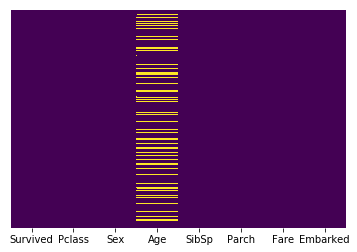

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### plotting Box plot

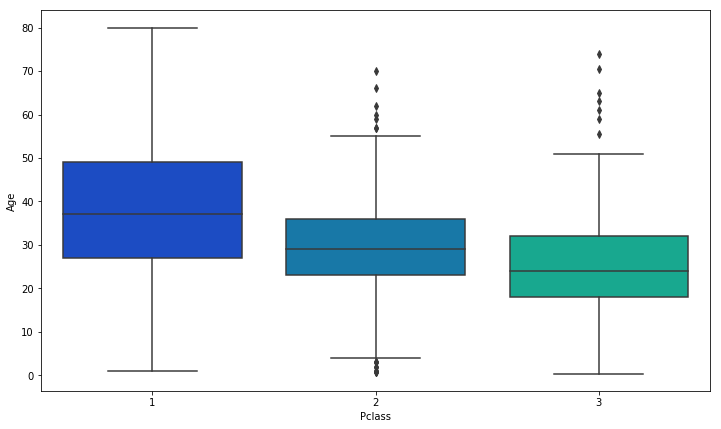

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [13]:
data1=data


In [14]:
Imputer=SimpleImputer()
mean = data['Age'].mean()
data['Age'].fillna(mean, inplace =True)

In [15]:
mode=data['Embarked'].mode()
data['Embarked'].fillna(mode[0], inplace =True)

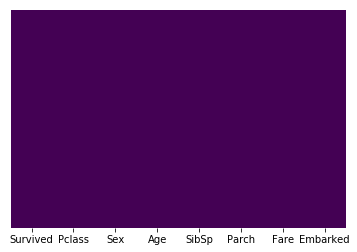

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Exploratory Data Analysis 

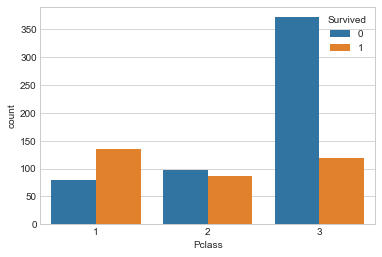

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=data)

#### Corelation Plot

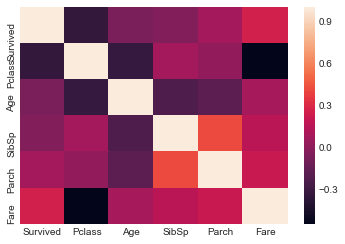

In [19]:
corr = data.corr()
sns.heatmap(corr)

## Datatype Conversion

In [20]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [21]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

#### Converting to category datatype

In [24]:
print (data.columns, data.shape)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object') (891, 8)


In [25]:
for col in ['Sex', 'Embarked']:
    data[col] = data[col].astype('category')

#### Convert categorical variable into dummy/indicator variables

    'pandas.get_dummies' is used to convert categorical variable into dummy/indicator variables

In [26]:
categorical_Attributes = data.select_dtypes(include=['category']).columns
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)
print (data.columns, data.shape)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object') (891, 9)


In [27]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


#### Scaling the data using StandardScaler

In [28]:
numeric_Attributes = data.select_dtypes(include=['int64','float64']).columns
numeric_Attributes

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [29]:
standardScaler = StandardScaler()
columns_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [30]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,1,0,1
1,1.0,-1.566107,0.638789,0.432793,-0.473674,0.786845,0,0,0
2,1.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,0,0,1
3,1.0,-1.566107,0.407926,0.432793,-0.473674,0.420730,0,0,1
4,0.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337,1,0,1


####  Splitting the data in to train and test



In [31]:
y=data['Survived']
X=data.drop(['Survived'],axis=1)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

#### Multiple Models

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [96]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', xgboost.XGBClassifier()))

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [98]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.779851
1  SVC  0.805970
2   LR  0.805970
3   DT  0.768657
4  GNB  0.787313
5   RF  0.802239
6  XGB  0.820896


## Logistic Regression

In [65]:
param={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   #L1=Lasso  L2 = Ridge

LR=LogisticRegression()
LR_cv=GridSearchCV(LR,param,cv=5)


LR_cv.fit(X_train,y_train)

print("Best parameters for LR",LR_cv.best_params_)
print("Accuracy:",LR_cv.best_score_)

Best parameters for LR {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8041733547351525


#### After tuning parameters

In [66]:
LR2=LogisticRegression(C=0.1,penalty="l2")
LR2.fit(X_train,y_train)
print("Accuracy",LR2.score(X_test,y_test))

Accuracy 0.8208955223880597


In [121]:
# Predictions on train data
LR_train=LR2.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,LR_train))

# Predictions on test data
LR_test=LR2.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,LR_test))

confusion_matrix on train data
 [[344  37]
 [ 77 165]]
confusion_matrix on test data
 [[150  18]
 [ 30  70]]


In [122]:
print("\nClassification Report on Train Data\n",classification_report(y_train,LR_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,LR_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       381
         1.0       0.82      0.68      0.74       242

    accuracy                           0.82       623
   macro avg       0.82      0.79      0.80       623
weighted avg       0.82      0.82      0.81       623


Classification Report on Test Data
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       168
         1.0       0.80      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [74]:
# set of parameters to test
param_grid = {"criterion":['gini', 'entropy'],
              "min_samples_split": [10, 20],
              "max_depth": [None, 5, 10],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10, 20],
              }

In [75]:
dt_cv = GridSearchCV(dt, param_grid, cv=5)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'max_leaf_nodes': [10, 2

In [77]:
dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
yy_pred=dt_cv.predict(X_test)

In [79]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, yy_pred)))

Accuracy = 0.828


In [119]:
# Predictions on train data
dt_train=dt_cv.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,dt_train))

# Predictions on test data
dt_test=dt_cv.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,dt_test))

confusion_matrix on train data
 [[343  38]
 [ 57 185]]
confusion_matrix on test data
 [[146  22]
 [ 24  76]]


In [120]:
print("\nClassification Report on Train Data\n",classification_report(y_train,dt_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,dt_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       381
         1.0       0.83      0.76      0.80       242

    accuracy                           0.85       623
   macro avg       0.84      0.83      0.84       623
weighted avg       0.85      0.85      0.85       623


Classification Report on Test Data
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       168
         1.0       0.78      0.76      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



## XGBoost

In [1]:
import xgboost
XGB=xgboost.XGBClassifier()

In [3]:
estimator = xgboost.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [100]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [111]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

In [112]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   12.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   26.4s
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},


In [113]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [114]:
xg_pred=grid_search.predict(X_test)

In [115]:
from sklearn import metrics

print("XGBoost Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, xg_pred)))

XGBoost Accuracy = 0.836


In [117]:
# Predictions on train data
xgb_train=grid_search.predict(X_train)

# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,xgb_train))

# Predictions on test data
xgb_test=grid_search.predict(X_test)

# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,xgb_test))

confusion_matrix on train data
 [[357  24]
 [ 52 190]]
confusion_matrix on test data
 [[154  14]
 [ 30  70]]


In [118]:
print("\nClassification Report on Train Data\n",classification_report(y_train,xgb_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,xgb_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       381
         1.0       0.89      0.79      0.83       242

    accuracy                           0.88       623
   macro avg       0.88      0.86      0.87       623
weighted avg       0.88      0.88      0.88       623


Classification Report on Test Data
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       168
         1.0       0.83      0.70      0.76       100

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



## Storing and Loading model from .pkl file

#### Since XGBoost has highest accuracy of 0.836, hence it is choosen as best model. Model is stored and loaded from .pkl file

In [124]:
from sklearn.externals import joblib 

In [125]:
# Save the model as a pickle in a file 
joblib.dump(grid_search, 'xgboost.pkl') 

['xgboost.pkl']

In [126]:
# Load the model from the file 
xgb_from_joblib = joblib.load('xgboost.pkl')   

In [127]:
# Use the loaded model to make predictions 
xgb_from_joblib.fit(X_train,y_train)
xgb_test=xgb_from_joblib.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   12.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   25.1s
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:   27.8s finished


In [128]:
xgb_train=xgb_from_joblib.predict(X_train)

In [129]:
from sklearn import metrics

print("XGBoost Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, xgb_test)))

XGBoost Accuracy = 0.836


#### Error Metrics

In [130]:


# Train data confusion Matrix
print("confusion_matrix on train data\n",confusion_matrix(y_train,xgb_train))



# Test data confusion Matrix
print("confusion_matrix on test data\n",confusion_matrix(y_test,xgb_test))

confusion_matrix on train data
 [[357  24]
 [ 52 190]]
confusion_matrix on test data
 [[154  14]
 [ 30  70]]


In [131]:
print("\nClassification Report on Train Data\n",classification_report(y_train,xgb_train,digits=2))
print("\nClassification Report on Test Data\n",classification_report(y_test,xgb_test,digits=2))


Classification Report on Train Data
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       381
         1.0       0.89      0.79      0.83       242

    accuracy                           0.88       623
   macro avg       0.88      0.86      0.87       623
weighted avg       0.88      0.88      0.88       623


Classification Report on Test Data
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       168
         1.0       0.83      0.70      0.76       100

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268

